### Driven Data Pump it Up Challenge:

In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
#import os
#os.environ["PROJ_LIB"] = "C:\\Users\\rtalebiz\\AppData\\Local\\Continuum\\anaconda3\\Library\\share"
#from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [2]:
#Reading the df files and assigning them to variables - we have 2 csv files
training_label = pd.read_csv('data/training set labels.csv')
training_values_df = pd.read_csv('data/training set values.csv')

In [3]:
# Merge training_values_df and training_label dfs to have one df
train_df = pd.merge(training_values_df, training_label, on = "id")

In [4]:
# Deleting training_label df
del training_label

In [5]:
# Creating a copy of train df so making changes would not alter the initial dataset
df = train_df.copy()

#### Let's look at our data using .info(), .shape and .head() methods

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [7]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

### We notice that some of our features like *(funder, installer, subvillage, public_meeting, scheme_management, scheme_name and permit)* have missing values. We need to look at these features and decide if they play a vitale role in predicting which pump is likely to stop working. Also, some of these features have duplicate data like *funder and installer* so I would likely drop one of them.

In [8]:
df.shape

(59400, 41)

#### Our dataset has 59,400 datapoints and 41 features. Now let's look at a few datapoints using .head()

In [9]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


### I'll be looking at some of these features and dropping the ones with duplicate data as well as figuring out a way to fill all the NaNs and/or 0s

#### Now let's look at the amount of each functional type pumps in our dataset

In [10]:
# The count of each fuctional type of the pumps in status_group so that we will understand the functional scenario 
# of the pump status
print('Count of each functional type:' + '\n' + str(df.status_group.value_counts()))
print('\n' + 'Percent of each functional type:' + '\n' + str(df.status_group.value_counts(normalize=True) * 100))

Count of each functional type:
functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

Percent of each functional type:
functional                 54.308081
non functional             38.424242
functional needs repair     7.267677
Name: status_group, dtype: float64


#### By the above figures, we can roughly estimate that there is 54.31% chance that if we take a random pump in the data to be a functional pump.

### Now let's separate our Numerical and Categorical features and visualize some of the most sensitive columns

In [11]:
sensitive_num_features = [
    'amount_tsh',
    'gps_height',
    'longitude',
    'latitude',
    'population',
    'construction_year'
]

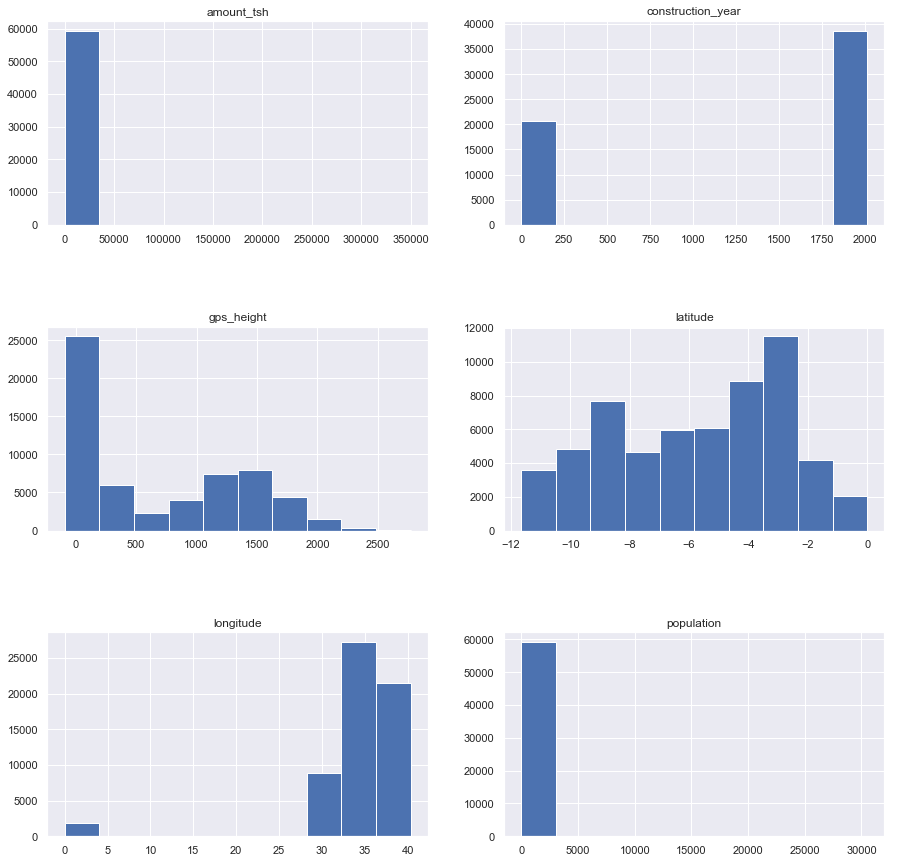

In [12]:
sns.set()
df.loc[:,sensitive_num_features].hist()
fig = plt.gcf()
fig.set_size_inches(15,15)
fig.subplots_adjust(wspace=0.2, hspace=0.5)

### Let's look at the Numerical values

In [13]:
#df[df['construction_year'] == 0]

In [14]:
df['construction_year'].value_counts(normalize=True) * 100

0       34.863636
2010     4.452862
2008     4.398990
2009     4.264310
2000     3.520202
2007     2.671717
2006     2.476431
2003     2.164983
2011     2.114478
2004     1.890572
2012     1.824916
2002     1.809764
1978     1.745791
1995     1.707071
2005     1.702020
1999     1.648148
1998     1.626263
1990     1.606061
1985     1.590909
1980     1.365320
1996     1.365320
1984     1.311448
1982     1.252525
1994     1.242424
1972     1.191919
1974     1.138047
1997     1.084175
1992     1.077441
1993     1.023569
2001     0.909091
1988     0.877104
1983     0.821549
1975     0.735690
1986     0.730640
1976     0.696970
1970     0.691919
1991     0.545455
1989     0.531987
1987     0.508418
1981     0.400673
1977     0.340067
1979     0.323232
1973     0.309764
2013     0.296296
1971     0.244108
1960     0.171717
1967     0.148148
1963     0.143098
1968     0.129630
1969     0.099327
1964     0.067340
1962     0.050505
1961     0.035354
1965     0.031987
1966     0.028620
Name: cons

In [15]:
#df[df['population'] == 0]

In [16]:
df['population'].value_counts(normalize=True) * 100

0       35.994949
1       11.826599
200      3.265993
150      3.185185
250      2.829966
          ...    
3241     0.001684
1960     0.001684
1685     0.001684
2248     0.001684
1439     0.001684
Name: population, Length: 1049, dtype: float64

In [17]:
df['amount_tsh'].value_counts(normalize=True) * 100

0.0         70.099327
500.0        5.222222
50.0         4.161616
1000.0       2.505051
20.0         2.462963
              ...    
8500.0       0.001684
6300.0       0.001684
220.0        0.001684
138000.0     0.001684
12.0         0.001684
Name: amount_tsh, Length: 98, dtype: float64

### We see above that we have 70% *'amount_tsh'* == 0 (amount water available to waterpoint) and this doesn't make sense when the *'quantity'* is not 'dry'. I'll assume that 0 value in *'amount_tsh'* means we are missing values in this feature and we need to handle it.

In [18]:
#dropping this feature because it has too many missing values. 70% 0s.
#df.drop('amount_tsh', axis=1, inplace=True)

In [19]:
df['gps_height'].value_counts(normalize=True) * 100

 0       34.407407
-15       0.101010
-16       0.092593
-13       0.092593
-20       0.087542
           ...    
 2285     0.001684
 2424     0.001684
 2552     0.001684
 2413     0.001684
 2385     0.001684
Name: gps_height, Length: 2428, dtype: float64

In [20]:
df['longitude'].value_counts(normalize=True) * 100

0.000000     3.050505
37.540901    0.003367
33.010510    0.003367
39.093484    0.003367
32.972719    0.003367
               ...   
37.579803    0.001684
33.196490    0.001684
34.017119    0.001684
33.788326    0.001684
30.163579    0.001684
Name: longitude, Length: 57516, dtype: float64

#### As we can see above, we have 3% counts of the value 0 for longitude which is not correct according to the map of Tanzania. [Map of Tanzania with latitude and longitude](https://www.worldatlas.com/img/areamap/44fb0cbaa5eb7ba2770b00485a23d97a.gif). You can also find more information about Tanzania using this [link](https://www.worldatlas.com/webimage/countrys/africa/tz.htm)

In [21]:
df['latitude'].value_counts(normalize=True) * 100

-2.000000e-08    3.050505
-6.985842e+00    0.003367
-3.797579e+00    0.003367
-6.981884e+00    0.003367
-7.104625e+00    0.003367
                   ...   
-5.726001e+00    0.001684
-9.646831e+00    0.001684
-8.124530e+00    0.001684
-2.535985e+00    0.001684
-2.598965e+00    0.001684
Name: latitude, Length: 57517, dtype: float64

In [22]:
df['date_recorded'] = pd.to_datetime(df['date_recorded'])
#df['construction_year'] = df.construction_year.map(lambda x: np.nan if x == 0 else x)

In [23]:
#recalculate operation year
#df['operation_year'] = df.date_recorded.dt.year - df.construction_year

In [24]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [25]:
# We can see that there are 41639 0's in amount_tsh column. Since these 0's might cause some 
#issues later, we need to change them to NaN values and then replace the NaN values 
#with transform("mean") and transform("median") - This is also true for population and gps_height
df['amount_tsh'].replace(0.0, np.nan, inplace=True)
df['gps_height'].replace(0.0, np.nan, inplace=True)
df['population'].replace(0.0, np.nan, inplace=True)
df['longitude'].replace(0.0, np.nan, inplace=True)
df['latitude'].replace(0.0, np.nan, inplace=True)
df['construction_year'].replace(0, np.nan, inplace=True)
#df['pupm_age'].replace('0', np.nan, inplace=True)

In [26]:
df['amount_tsh'].fillna(df.groupby(['region', 'district_code'])['amount_tsh'].transform('median'), inplace=True)
df['amount_tsh'].fillna(df.groupby(['region'])['amount_tsh'].transform('median'), inplace=True)
df['amount_tsh'].fillna(df['amount_tsh'].median(), inplace=True)
df['gps_height'].fillna(df.groupby(['region', 'district_code'])['gps_height'].transform('mean'), inplace=True)
df['gps_height'].fillna(df.groupby(['region'])['gps_height'].transform('mean'), inplace=True)
df['gps_height'].fillna(df['gps_height'].mean(), inplace=True)
df['population'].fillna(df.groupby(['region', 'district_code'])['population'].transform("median"), inplace=True)
df['population'].fillna(df.groupby(['region'])['population'].transform('median'), inplace=True)
df['population'].fillna(df['population'].median(), inplace=True)
df['longitude'].fillna(df.groupby(['region', 'district_code'])['longitude'].transform('mean'), inplace=True)
df['longitude'].fillna(df.groupby(['region'])['longitude'].transform('mean'), inplace=True)
df['latitude'].fillna(df.groupby(['region', 'district_code'])['latitude'].transform('mean'), inplace=True)
df['construction_year'].fillna(df['construction_year'].mean(), inplace=True)

### Let's start to remove unnecessary features

In [27]:
list(df.select_dtypes(object))

['funder',
 'installer',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'status_group']

In [28]:
#df['funder'].unique()

In [29]:
#df['lga'].unique()

In [30]:
df['recorded_by'].unique()

array(['GeoData Consultants Ltd'], dtype=object)

In [31]:
# Recorded_by has no unique values so let's drop this feature
#df.drop('recorded_by', axis=1, inplace=True)

In [32]:
# Also dropping 'public_meeting' and 'permit' features because they are not sensitive
#df.drop('public_meeting', axis=1, inplace=True)
#df.drop('permit', axis=1, inplace=True)

### For every important categorical response, we convert the levels to lower case, in case there is a random capitalization

In [33]:
#df.installer = df.installer.str.lower()
df.funder = df.funder.str.lower()
#df.wpt_name = df.wpt_name.str.lower()
df.basin = df.basin.str.lower()
#df.subvillage = df.subvillage.str.lower()
df.region = df.region.str.lower()
df.lga = df.lga.str.lower()
#df.ward = df.ward.str.lower()
df.management = df.management.str.lower()
#df.management_group = df.management_group.str.lower()
df.scheme_management = df.scheme_management.str.lower()

### Now let's look at categorical features that have similar information

In [34]:
df.groupby(['installer', 'funder']).size()

installer       funder                
-               government of tanzania      2
                kalebejo parish             1
0               0                         777
A.D.B           hesawa                      1
AAR             aar                         4
                                         ... 
water board     world bank                  1
wizara ya maji  serikali                    2
world           world bank                  4
world banks     world bank                  1
world vision    world vision                1
Length: 3697, dtype: int64

In [35]:
#df.drop('installer',axis=1,inplace=True)

In [36]:
#start with extraction_type, extraction_type_group, and extraction_type_class
df.groupby(['extraction_type_group', 'extraction_type_class','extraction_type']).size()

extraction_type_group  extraction_type_class  extraction_type          
afridev                handpump               afridev                       1770
gravity                gravity                gravity                      26780
india mark ii          handpump               india mark ii                 2400
india mark iii         handpump               india mark iii                  98
mono                   motorpump              mono                          2865
nira/tanira            handpump               nira/tanira                   8154
other                  other                  other                         6430
other handpump         handpump               other - mkulima/shinyanga        2
                                              other - play pump               85
                                              other - swn 81                 229
                                              walimi                          48
other motorpump        motorpump     

In [37]:
#df.drop(['extraction_type_group', 'extraction_type_class'],axis=1,inplace=True)

In [38]:
df.groupby(['lga', 'ward']).size()

lga           ward      
arusha rural  Bangata        33
              Bwawani        37
              Ilkiding'a     86
              Kimnyaki       79
              Kiranyi       115
                           ... 
uyui          Ndono          12
              Shitage         3
              Ufuluma        16
              Upuge          18
              Usagali        25
Length: 2191, dtype: int64

In [39]:
#df.drop('ward',axis=1,inplace=True)

In [40]:
df.groupby(['management', 'management_group']).size()

management        management_group
company           commercial            685
other             other                 844
other - school    other                  99
parastatal        parastatal           1768
private operator  commercial           1971
trust             commercial             78
unknown           unknown               561
vwc               user-group          40507
water authority   commercial            904
water board       user-group           2933
wua               user-group           2535
wug               user-group           6515
dtype: int64

In [41]:
#df.drop('management_group',axis=1,inplace=True)

In [42]:
df.groupby(['scheme_management', 'scheme_name']).size()

scheme_management  scheme_name                     
company            BFFS                                  1
                   Bagamoyo Wate                        60
                   Bagamoyo wate                       210
                   Borehole                              1
                   Borehole drilling project             1
                                                      ... 
wug                Water Project Mbawala chini          14
                   Water pipe scheme                     2
                   Water sector development program      5
                   Windmili system                       1
                   mhunze water piped scheme             1
Length: 3077, dtype: int64

In [43]:
#df.drop('scheme_name',axis=1,inplace=True)

In [44]:
df.groupby(['payment', 'payment_type']).size()

payment                payment_type
never pay              never pay       25348
other                  other            1054
pay annually           annually         3642
pay monthly            monthly          8300
pay per bucket         per bucket       8985
pay when scheme fails  on failure       3914
unknown                unknown          8157
dtype: int64

In [45]:
#df.drop('payment',axis=1,inplace=True)

In [46]:
df.groupby(['water_quality', 'quality_group']).size()

water_quality       quality_group
coloured            colored            490
fluoride            fluoride           200
fluoride abandoned  fluoride            17
milky               milky              804
salty               salty             4856
salty abandoned     salty              339
soft                good             50818
unknown             unknown           1876
dtype: int64

In [47]:
#df.drop('quality_group',axis=1,inplace=True)

In [48]:
df.groupby(['quantity', 'quantity_group']).size()

quantity      quantity_group
dry           dry                6246
enough        enough            33186
insufficient  insufficient      15129
seasonal      seasonal           4050
unknown       unknown             789
dtype: int64

In [49]:
#df.drop('quantity_group',axis=1,inplace=True)

In [50]:
df.groupby(['source', 'source_type', 'source_class']).size()

source                source_type           source_class
dam                   dam                   surface           656
hand dtw              borehole              groundwater       874
lake                  river/lake            surface           765
machine dbh           borehole              groundwater     11075
other                 other                 unknown           212
rainwater harvesting  rainwater harvesting  surface          2295
river                 river/lake            surface          9612
shallow well          shallow well          groundwater     16824
spring                spring                groundwater     17021
unknown               other                 unknown            66
dtype: int64

In [51]:
#df.drop('source_type',axis=1,inplace=True)

In [52]:
df.groupby(['waterpoint_type', 'waterpoint_type_group']).size()

waterpoint_type              waterpoint_type_group
cattle trough                cattle trough              116
communal standpipe           communal standpipe       28522
communal standpipe multiple  communal standpipe        6103
dam                          dam                          7
hand pump                    hand pump                17488
improved spring              improved spring            784
other                        other                     6380
dtype: int64

In [53]:
#df.drop('waterpoint_type_group',axis=1,inplace=True)

In [54]:
# region and region_code are representing the same thing
#f.drop('region', axis=1, inplace=True)

In [55]:
df['funder'].fillna("Unknown", inplace=True)
df['scheme_management'].fillna("Unknown", inplace=True)

In [56]:
#df['operation_year'] = df.date_recorded.dt.year - df.construction_year

In [57]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                       0
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management            0
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [58]:
df['pump_age'] = df.date_recorded.dt.year - df.construction_year

In [59]:
# To repalce the pump_age lower than 0 with 0 due to the wrong recorded_date dates.
for age in df.pump_age:
    if age < 0:
        df['pump_age'].replace(age, 0, inplace=True)

In [60]:
'''df[df['pump_age']<0][['pump_age','date_recorded','construction_year','status_group']]#, 'date_recorded', 'construction_year']].head(10)'''

"df[df['pump_age']<0][['pump_age','date_recorded','construction_year','status_group']]#, 'date_recorded', 'construction_year']].head(10)"

In [61]:
'''df[df['pump_age'] > 55][['pump_age','date_recorded','construction_year','status_group']]'''

"df[df['pump_age'] > 55][['pump_age','date_recorded','construction_year','status_group']]"

In [62]:
df[df['construction_year'] == 0][['pump_age','date_recorded','construction_year','status_group']]

,pump_age,date_recorded,construction_year,status_group


In [63]:
garbage_features = ['permit', 'public_meeting','installer','ward','wpt_name','num_private',
                    'subvillage','region_code','recorded_by', 'management_group', 'extraction_type_group',
                    'scheme_name', 'payment', 'quality_group', 'quantity_group',
                    'source_type', 'waterpoint_type_group']#,'date_recorded', 'construction_year']

df.drop(garbage_features,axis=1,inplace=True)

In [64]:
df.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
longitude                0
latitude                 0
basin                    0
region                   0
district_code            0
lga                      0
population               0
scheme_management        0
construction_year        0
extraction_type          0
extraction_type_class    0
management               0
payment_type             0
water_quality            0
quantity                 0
source                   0
source_class             0
waterpoint_type          0
status_group             0
pump_age                 0
dtype: int64

In [65]:
len(df.columns)

25

In [66]:
#plt.figure(figsize=(15,7))
#_ = sns.countplot(data=df,x='region',hue='status_group')
#_.set_xticklabels(_.get_xticklabels(),rotation=90)
#plt.legend(bbox_to_anchor=(1,1), loc=2)

In [67]:
#plt.figure(figsize=(15,7))
#sns.countplot(data=df,x='basin',hue='status_group')
#plt.legend(bbox_to_anchor=(1,1), loc=2)

functional                 54.308081
non functional             38.424242
functional needs repair     7.267677
Name: status_group, dtype: float64

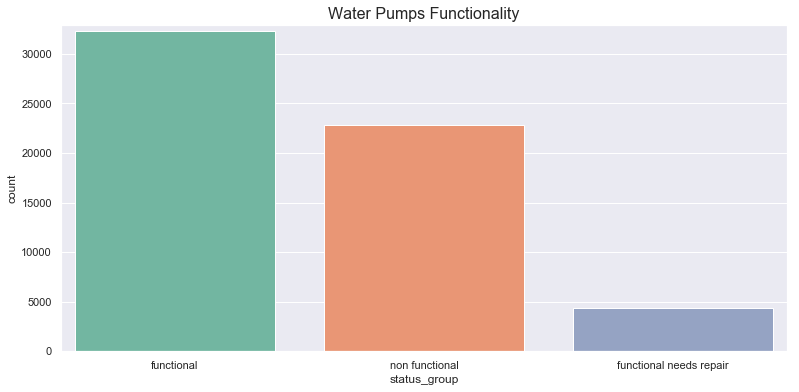

In [68]:
# Let's look at countplot of status_group that we need to eventually predict
plt.figure(figsize=(13,6))
sns.countplot(data=df, x='status_group', palette='Set2')
plt.title('Water Pumps Functionality',fontsize=16)
plt.margins(0.02)
df.status_group.value_counts(normalize=True) * 100

### Now let's compare the *status_group* feature with other Categorical features to see if we can find a trend

soft                  85.552189
salty                  8.175084
unknown                3.158249
milky                  1.353535
coloured               0.824916
salty abandoned        0.570707
fluoride               0.336700
fluoride abandoned     0.028620
Name: water_quality, dtype: float64

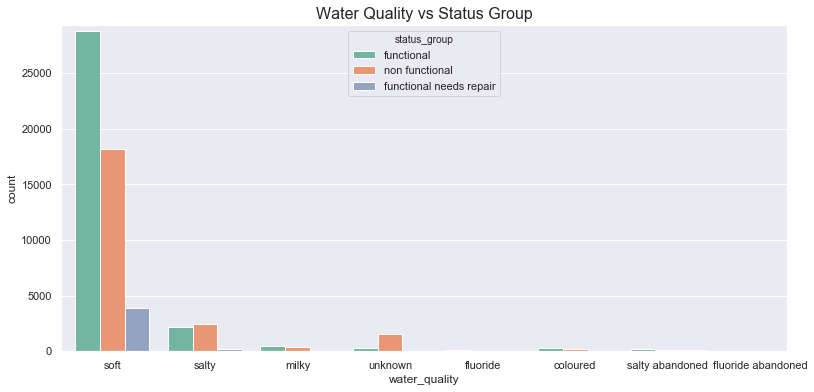

In [69]:
# Let's look at water_quality vs status_group 
plt.figure(figsize=(13,6))
sns.countplot(data=df,x='water_quality',hue='status_group', palette = 'Set2')
plt.title('Water Quality vs Status Group', fontsize=16)
plt.margins(0.02)
df.water_quality.value_counts(normalize=True) * 100

iringa           8.912458
shinyanga        8.387205
mbeya            7.809764
kilimanjaro      7.372054
morogoro         6.744108
arusha           5.639731
kagera           5.582492
mwanza           5.222222
kigoma           4.740741
ruvuma           4.444444
pwani            4.436027
tanga            4.287879
dodoma           3.705387
singida          3.523569
mara             3.314815
tabora           3.297980
rukwa            3.043771
mtwara           2.912458
manyara          2.664983
lindi            2.602694
dar es salaam    1.355219
Name: region, dtype: float64

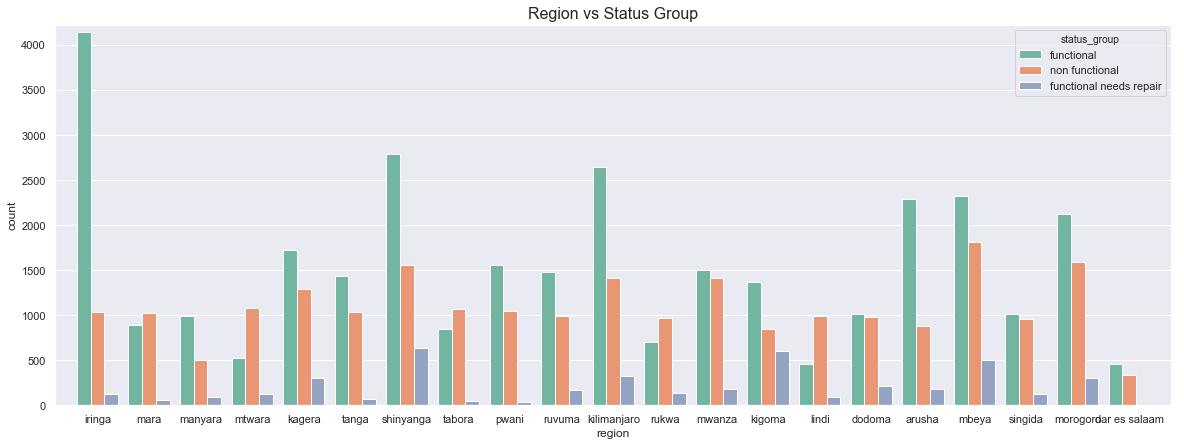

In [70]:
# Let's look at regions vs status group
plt.figure(figsize=(20, 7))
sns.countplot(data=df, x='region', hue='status_group', palette = 'Set2')
plt.title('Region vs Status Group',fontsize=16)
plt.margins(0.02)
df.region.value_counts(normalize=True) * 100

vwc                 68.193603
wug                 10.968013
water board          4.937710
wua                  4.267677
private operator     3.318182
parastatal           2.976431
water authority      1.521886
other                1.420875
company              1.153199
unknown              0.944444
other - school       0.166667
trust                0.131313
Name: management, dtype: float64

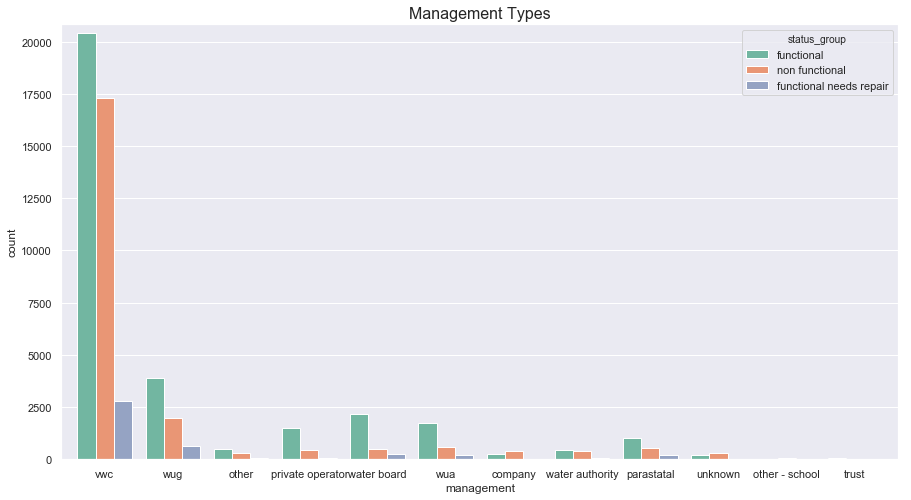

In [71]:
# Let's look at management types
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='management', hue='status_group',palette = 'Set2')
plt.title('Management Types',fontsize=16)
plt.margins(0.02)
df.management.value_counts(normalize=True) * 100

gravity         45.084175
handpump        27.703704
other           10.824916
submersible     10.402357
motorpump        5.028620
rope pump        0.759259
wind-powered     0.196970
Name: extraction_type_class, dtype: float64

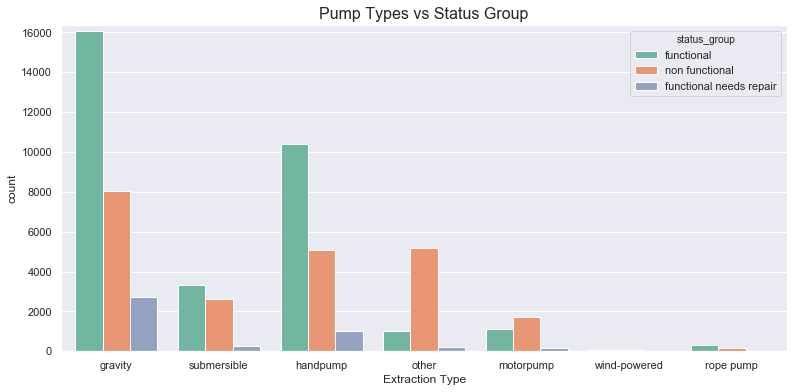

In [72]:
# Let's look at the types of pumps
plt.figure(figsize=(13,6))
sns.countplot(data=df, x='extraction_type_class', hue='status_group', palette = 'Set2')
plt.xlabel('Extraction Type')
plt.title('Pump Types vs Status Group',fontsize=16)
plt.margins(0.02)
df.extraction_type_class.value_counts(normalize=True) * 100

functional                 54.308081
non functional             38.424242
functional needs repair     7.267677
Name: status_group, dtype: float64

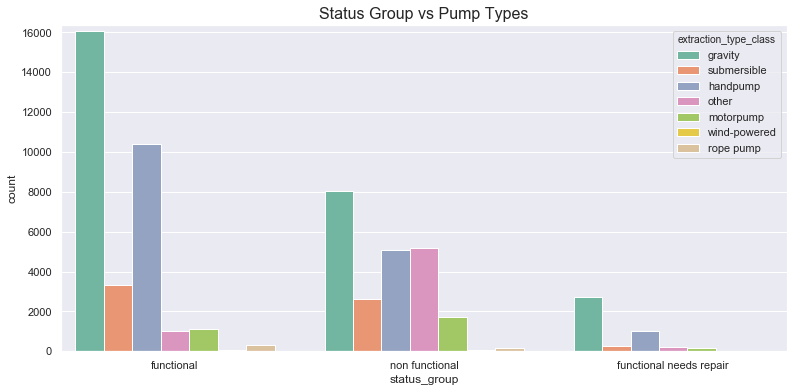

In [73]:
# Let's switch the status_group and extraction_type_class in x and hue
plt.figure(figsize=(13,6))
sns.countplot(data=df, x='status_group',hue='extraction_type_class', palette = 'Set2')
plt.title('Status Group vs Pump Types',fontsize=16)
plt.margins(0.02)
df.status_group.value_counts(normalize=True) * 100

gravity         45.084175
handpump        27.703704
other           10.824916
submersible     10.402357
motorpump        5.028620
rope pump        0.759259
wind-powered     0.196970
Name: extraction_type_class, dtype: float64

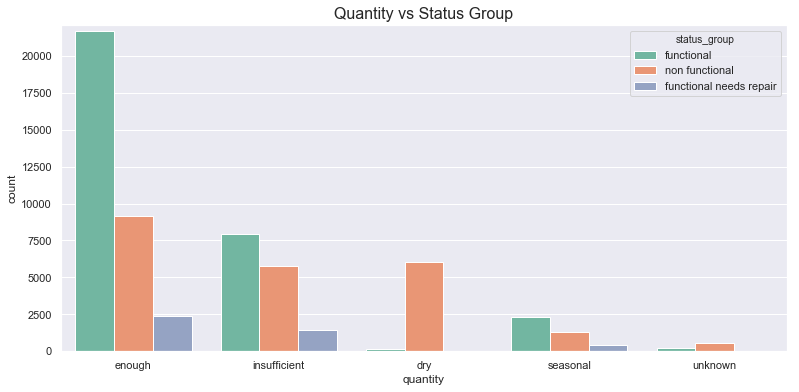

In [74]:
# Let's look at the quantity and status_group
plt.figure(figsize=(13,6))
sns.countplot(data=df,x='quantity',hue='status_group', palette = 'Set2')
plt.title('Quantity vs Status Group',fontsize=16)
plt.margins(0.02)
df.extraction_type_class.value_counts(normalize=True) * 100

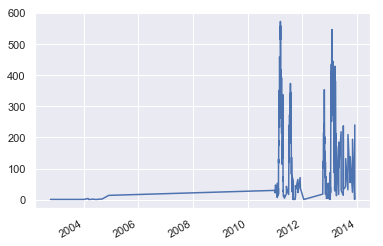

In [75]:
#look at water pump recorded over years as well as the age
df['date_recorded'].value_counts().sort_index().plot()

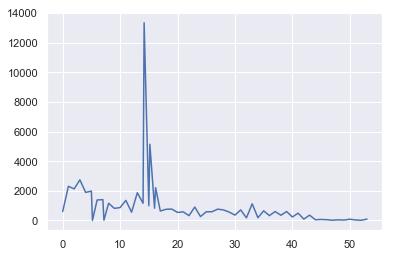

In [76]:
df['pump_age'].value_counts().sort_index().plot()

In [77]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

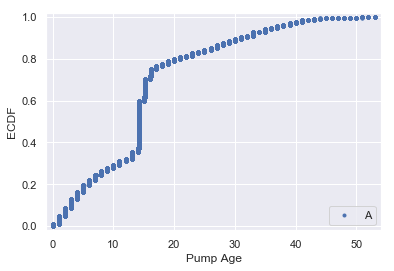

In [78]:
# Compute ECDF of Pump Age
x_age, y_age = ecdf(df.pump_age)

# Plot the ECDFs
_ = plt.plot(x_age, y_age, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('Pump Age')
_ = plt.ylabel('ECDF')
_ = plt.legend(('Age'), loc='lower right')

# Show the plot
plt.show()

In [79]:
BBox = ((df.longitude.min(),   df.longitude.max(),      
         df.latitude.min(), df.latitude.max()))
BBox

(29.6071219, 40.34519307, -11.64944018, -2e-08)

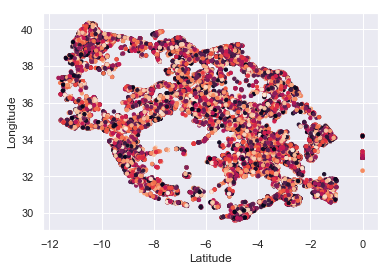

In [80]:
N = 59400
colors = np.random.rand(N)
plt.scatter(x = df.latitude, y = df.longitude, c=colors, s=np.log(df.status_group.count()))
plt.xlabel('Latitude')
plt.ylabel('Longitude');

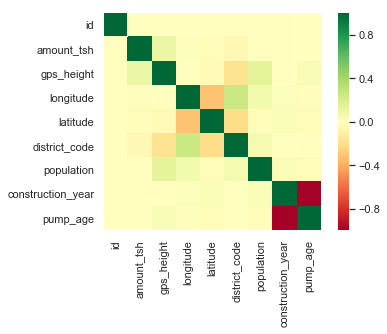

In [81]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [82]:
pd.DataFrame.to_csv(df, "data/cleaned_df_v2.csv", index=False)

In [83]:
'''df.info()'''

'df.info()'

In [84]:
'''df.date_recorded.head()'''

'df.date_recorded.head()'

In [85]:
'''df.head()'''

'df.head()'

In [86]:
'''df.pump_age.max(), df.pump_age.min()'''

'df.pump_age.max(), df.pump_age.min()'

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     59400 non-null  int64         
 1   amount_tsh             59400 non-null  float64       
 2   date_recorded          59400 non-null  datetime64[ns]
 3   funder                 59400 non-null  object        
 4   gps_height             59400 non-null  int64         
 5   longitude              59400 non-null  float64       
 6   latitude               59400 non-null  float64       
 7   basin                  59400 non-null  object        
 8   region                 59400 non-null  object        
 9   district_code          59400 non-null  int64         
 10  lga                    59400 non-null  object        
 11  population             59400 non-null  int64         
 12  scheme_management      59400 non-null  object        
 13  c

In [88]:
df.extraction_type.value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [89]:
df.funder.value_counts()[:10]

government of tanzania    9084
Unknown                   3635
danida                    3114
hesawa                    2202
rwssp                     1374
world bank                1349
kkkt                      1287
world vision              1246
unicef                    1057
tasaf                      877
Name: funder, dtype: int64

In [90]:
df.basin.value_counts()

lake victoria              10248
pangani                     8940
rufiji                      7976
internal                    7785
lake tanganyika             6432
wami / ruvu                 5987
lake nyasa                  5085
ruvuma / southern coast     4493
lake rukwa                  2454
Name: basin, dtype: int64

In [91]:
df.district_code.value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64